In [1]:
# importing labratories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster


In [2]:
# importing data
df = pd.read_csv(
    "dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv"
)
lsoa=pd.read_csv("Lower_Super_Output_Area_(LSOA)_IMD2019__(WGS84).csv"
)

In [3]:
df.describe

<bound method NDFrame.describe of             status accident_index  accident_year accident_reference  \
0      Unvalidated  2022070151244           2022          070151244   
1      Unvalidated  2022070152668           2022          070152668   
2      Unvalidated  2022070154696           2022          070154696   
3      Unvalidated  2022070154696           2022          070154696   
4      Unvalidated  2022070154696           2022          070154696   
...            ...            ...            ...                ...   
61347  Unvalidated  2022461156711           2022          461156711   
61348  Unvalidated  2022461157243           2022          461157243   
61349  Unvalidated  2022461157256           2022          461157256   
61350  Unvalidated  2022461157316           2022          461157316   
61351  Unvalidated  2022461159841           2022          461159841   

       vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                      2        

cleaning data

In [4]:
print(df.isnull().sum())#no null 


status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64


In [5]:
#droping unneeded data
#accident_year	+accident_reference=accident_index
df.drop('status', axis=1, inplace=True)#status is the same for all data
df.drop('accident_year', axis=1, inplace=True)#accident_year is the same for all data
df.drop('accident_index', axis=1, inplace=True)#accident_index  has the same pattern as accident_reference
df.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [6]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [accident_reference, vehicle_reference, casualty_reference, casualty_class, sex_of_casualty, age_of_casualty, age_band_of_casualty, casualty_severity, pedestrian_location, pedestrian_movement, car_passenger, bus_or_coach_passenger, pedestrian_road_maintenance_worker, casualty_type, casualty_home_area_type, casualty_imd_decile, lsoa_of_casualty]
Index: []


In [7]:
# #checking all category with dataframe guild
# df['vehicle_reference'].value_counts()#is ok
# df['casualty_severity'].value_counts()#is ok
# df['casualty_reference'].value_counts()#is ok
# df['casualty_class'].value_counts()#is ok
# df['pedestrian_location'].value_counts()#is ok
# df['pedestrian_movement'].value_counts()#is ok

In [8]:
#checking all category with dataframe guild
#is not ok[1 male 2 female -1 Data missing or out of range 9 unknown] we will remove data with value -1 or 9
df.drop(df[(df['sex_of_casualty'] == -1) | (df['sex_of_casualty'] == 9)].index, inplace=True)

In [9]:
#-1 :Data missing or out of range,no information about age has found
df.drop(df[(df['age_of_casualty'] == -1) & (df['age_band_of_casualty'] == -1)].index, inplace=True)


In [10]:
#is  not ok removing data with value -1 and 9
df.drop(df[(df['car_passenger'] == -1) | (df['car_passenger'] == 9)].index, inplace=True)

In [11]:
#is  not ok removing data with value -1 and 9
df.drop(df[(df['bus_or_coach_passenger'] == -1) | (df['bus_or_coach_passenger'] == 9)].index, inplace=True)

In [12]:
#is  not ok removing data with value -1 
df.drop(df[(df['pedestrian_road_maintenance_worker'] == -1) ].index, inplace=True)

In [13]:
#is  not ok removing data with value -1 and 99
df.drop(df[(df['casualty_type'] == -1) | (df['casualty_type'] == 99)].index, inplace=True)

In [14]:
#is  not ok removing data with value -1
df.drop(df[(df['casualty_home_area_type'] == -1) ].index, inplace=True)

In [15]:
#is  not ok removing data with value -1
df.drop(df[(df['casualty_imd_decile'] == -1) ].index, inplace=True)

In [16]:
#geometrical data,removing data with value -1
df.drop(df[(df['lsoa_of_casualty'] == -1)| (df['lsoa_of_casualty'] == '-1' )].index, inplace=True)

In [17]:
lsoa.head()

,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Area,Shape__Length
0,1,E01000001,City of London 001A,29199,9,343894.195702,3682.367055
1,2,E01000002,City of London 001B,30379,10,583453.103058,3910.314357
2,3,E01000003,City of London 001C,14915,5,147833.971008,1834.896718
3,4,E01000005,City of London 001E,8678,3,491901.220234,3483.118352
4,5,E01000006,Barking and Dagenham 016A,14486,5,372254.489704,3108.596473


In [18]:
df.head()

,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [19]:
# print("Columns in df:", df.columns)
# print("Columns in lsoa:", lsoa.columns)

In [20]:
merged_data = pd.merge(df, lsoa, left_on='lsoa_of_casualty', right_on='lsoa11cd')


In [21]:
# # Create a GeoDataFrame (if your data contains geometries)
# gdf_lsoa = gpd.GeoDataFrame(lsoa, 
#                             geometry=gpd.points_from_xy(lsoa.longitude, lsoa.latitude))


In [22]:
# Create a DataFrame to store the results
summary_table = pd.DataFrame(columns=['Column Name', 'Most Repeated Value', 'Number of Occurrences'])
# selected_columns = ['vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty',
#                      'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
#                      'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 
#                      'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type',
#                      'casualty_imd_decile', 'country', 'location_code']
selected_columns = df.columns.tolist()

# Loop through each column
for column in selected_columns:
    # Get the most common values and their counts
    top_values = df[column].value_counts().head(1)
    
    # Create a DataFrame with the current column's information
    column_summary = pd.DataFrame({
        'Column Name': [column],
        'Most Repeated Value': [top_values.index[0]],
        'Number of Occurrences': [top_values.values[0]]
    })
    
    # Concatenate the current column's information to the summary table
    summary_table = pd.concat([summary_table, column_summary], ignore_index=True)

# Display the summary table
print(summary_table)

                           Column Name Most Repeated Value  \
0                   accident_reference           010377133   
1                    vehicle_reference                   1   
2                   casualty_reference                   1   
3                       casualty_class                   1   
4                      sex_of_casualty                   1   
5                      age_of_casualty                  18   
6                 age_band_of_casualty                   6   
7                    casualty_severity                   3   
8                  pedestrian_location                   0   
9                  pedestrian_movement                   0   
10                       car_passenger                   0   
11              bus_or_coach_passenger                   0   
12  pedestrian_road_maintenance_worker                   0   
13                       casualty_type                   9   
14             casualty_home_area_type                   1   
15      

In [23]:

# Get the list of column names from the main DataFrame
selected_columns = df.columns.tolist()

# Create an empty list to store DataFrames
summary_tables = list()

# Loop through each column
for column in selected_columns:
    # Get the most common values and their counts
    top_values = df[column].value_counts().head(1)
    
    # Create a DataFrame with the information
    summary_table = pd.DataFrame({
        'Column Name': [column],
        'Most Repeated Value': [top_values.index[0]],
        'Number of Occurrences': [top_values.values[0]]
    })
    
    # Add the DataFrame to the list
    summary_tables.append(summary_table)

# Concatenate the list of DataFrames into the final summary table
summary_table = pd.concat(summary_tables, ignore_index=True)

# Sort the summary table by the number of occurrences
summary_table = summary_table.sort_values(by='Number of Occurrences', ascending=False)

# Create an interactive bar chart using plotly
fig = px.bar(summary_table, x='Column Name', y='Number of Occurrences',
             text='Most Repeated Value', title='Most Repeated Values in Each Column',
             labels={'Number of Occurrences': 'Count'},
             height=500, width=1000)

# Customize the layout to improve readability
fig.update_layout(xaxis=dict(tickangle=45), showlegend=False)

# Display the plot
fig.show()

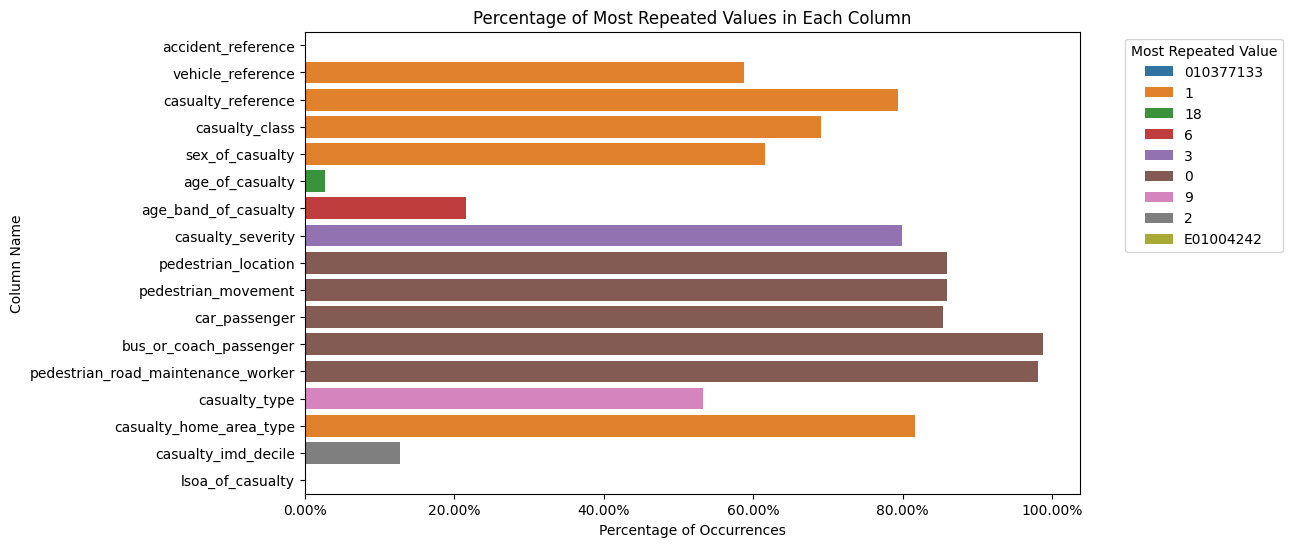

In [24]:
# Create an empty list to store the data
summary_data = list()

# Loop through selected columns
for column in df.columns:
    # Get the most common values and their counts
    top_values = df[column].value_counts().head(1)
    
    # Calculate the percentage of occurrences
    percentage = (top_values / len(df)) * 100

    # Append the information to the list
    summary_data.append({
        'Column Name': column,
        'Most Repeated Value': top_values.index[0],
        'Percentage of Occurrences': percentage.values[0]
    })

# Create a DataFrame from the list
summary_table = pd.DataFrame(summary_data)

# Plot the histogram with hover labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage of Occurrences', y='Column Name', data=summary_table, hue='Most Repeated Value', dodge=False)

# Format hover labels to show the exact percentage value
def show_percentage(x, pos):
    return f"{x:.2f}%"

formatter = FuncFormatter(show_percentage)
ax.xaxis.set_major_formatter(formatter)

plt.title('Percentage of Most Repeated Values in Each Column')
plt.xlabel('Percentage of Occurrences')
plt.ylabel('Column Name')
plt.legend(title='Most Repeated Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

visualizing data 

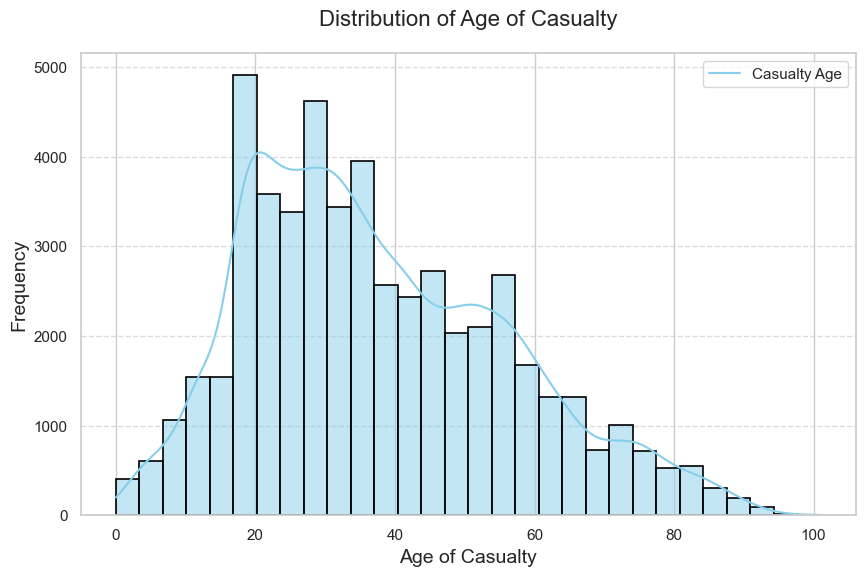

In [25]:
#Histogram for age_of_casualty

sns.set_theme(style="whitegrid", palette="pastel")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age_of_casualty'], bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)

# Add title and labels
plt.title('Distribution of Age of Casualty', fontsize=16, pad=20)
plt.xlabel('Age of Casualty', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding legend if needed
plt.legend(["Casualty Age"], loc="upper right")

# Show the plot
plt.show()

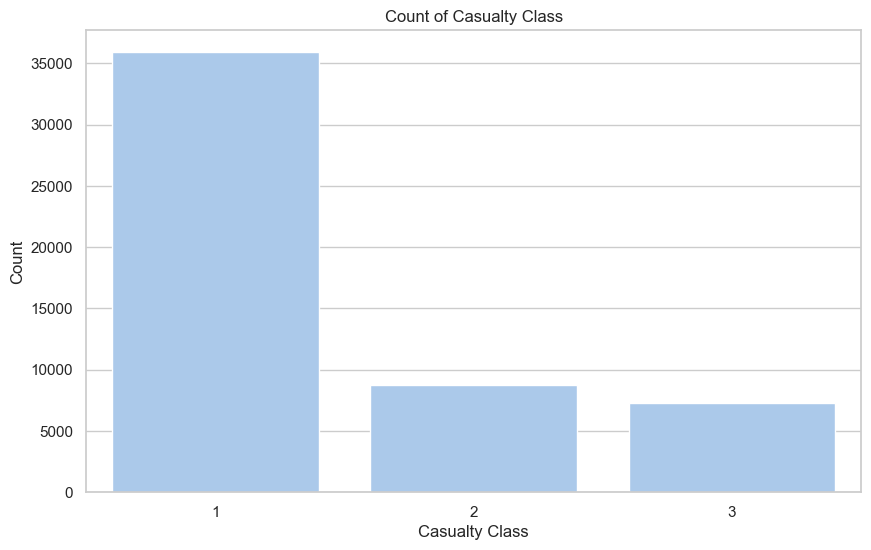

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='casualty_class', data=df)
plt.title('Count of Casualty Class')
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.show()

In [27]:
df.drop('accident_reference', axis=1, inplace=True)

In [28]:
# Create new columns 'country' and 'location_code' based on 'lsoa_of_casualty'
df['country'] = df['lsoa_of_casualty'].str[0]  # Extract the first character (W or E)
df['location_code'] = df['lsoa_of_casualty'].str[1:]  # Extract the remaining characters
# Replace 'E' with 1 and 'W' with 0 in the 'country' column
df['country'] = df['country'].replace({'E': 1, 'W': 0})
df.drop('lsoa_of_casualty', axis=1, inplace=True)

C:\Users\axe\AppData\Local\Temp\ipykernel_13904\4236737866.py:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [29]:
# Assuming 'casualty_severity' is categorical with levels 1, 2, 3
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
df['casualty_severity'] = df['casualty_severity'].map(severity_mapping)

# Select features (excluding the target variable)
features = df.drop(['casualty_severity',], axis=1)

# Select the target variable
target = df['casualty_severity']


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [31]:
# Use label encoding for target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [32]:
# Create a list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Support Vector Machine', SVR()),
    ('Neural Network', MLPRegressor())
]

In [33]:
models = [
    ('Linear Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('Neural Network', MLPClassifier(max_iter=1000))
]

In [34]:

best_model = None
best_accuracy = 0

for name, model in models:
    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test_encoded, predictions)

    # Update best model if needed
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(classification_report(y_test_encoded, predictions))
    print('-' * 40)


Model: Linear Regression
Accuracy: 0.8028642829680892
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.17      0.00      0.00      1923
           2       0.80      1.00      0.89      8355

    accuracy                           0.80     10404
   macro avg       0.32      0.33      0.30     10404
weighted avg       0.68      0.80      0.72     10404

----------------------------------------


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Model: Decision Tree
Accuracy: 0.6944444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.04      0.04       126
           1       0.24      0.26      0.25      1923
           2       0.82      0.80      0.81      8355

    accuracy                           0.69     10404
   macro avg       0.37      0.37      0.37     10404
weighted avg       0.70      0.69      0.70     10404

----------------------------------------
Model: Random Forest
Accuracy: 0.7825836216839677
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.34      0.13      0.18      1923
           2       0.82      0.95      0.88      8355

    accuracy                           0.78     10404
   macro avg       0.39      0.36      0.35     10404
weighted avg       0.72      0.78      0.74     10404

----------------------------------------
Model: Gra

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

Model: Neural Network
Accuracy: 0.7963283352556709
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.39      0.08      0.13      1923
           2       0.81      0.97      0.89      8355

    accuracy                           0.80     10404
   macro avg       0.40      0.35      0.34     10404
weighted avg       0.72      0.80      0.74     10404

----------------------------------------


C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\axe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [35]:
print(f'Best Model: {best_model.__class__.__name__}')


Best Model: SVC


In [36]:
print(f'Best Accuracy: {best_accuracy}')

Best Accuracy: 0.802960399846213


Relationship between casualty_class and Casualty Severity

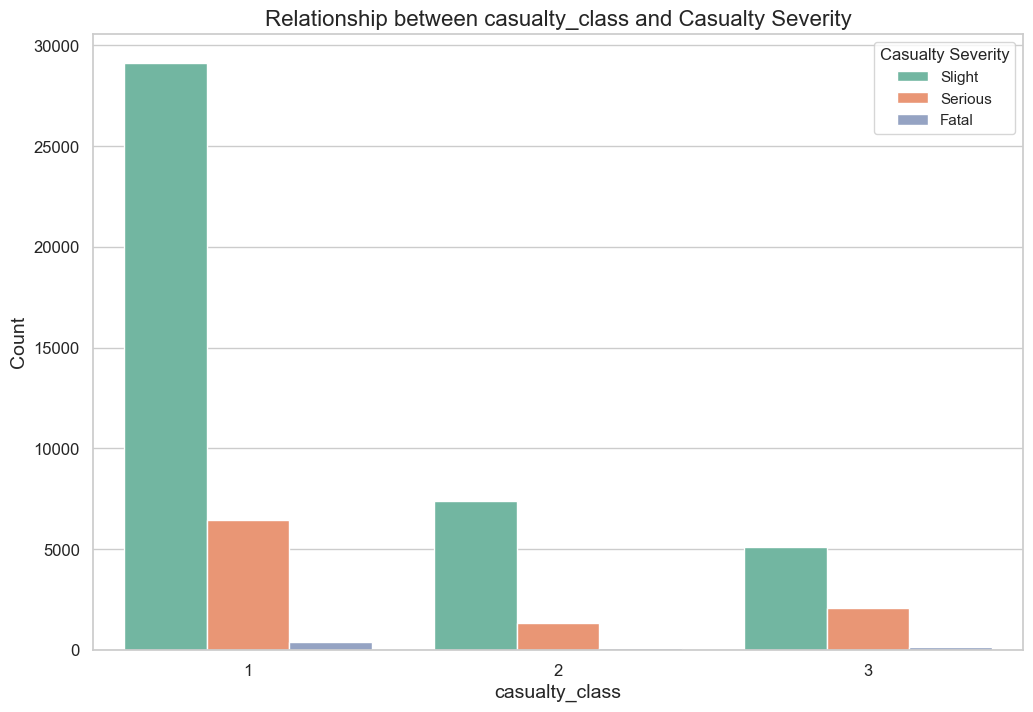

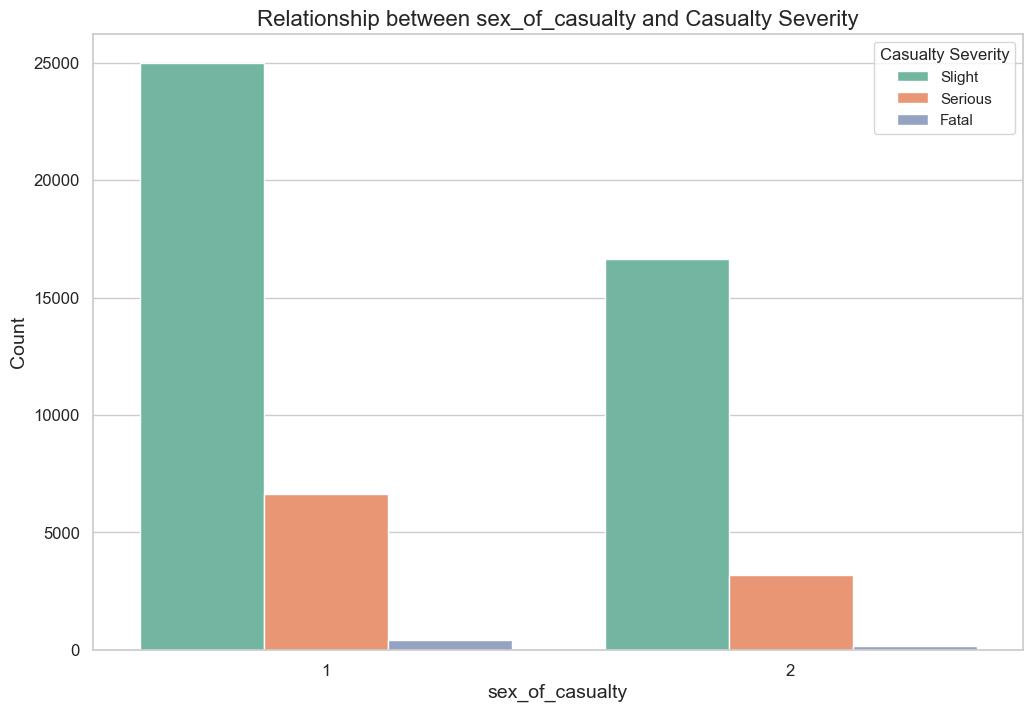

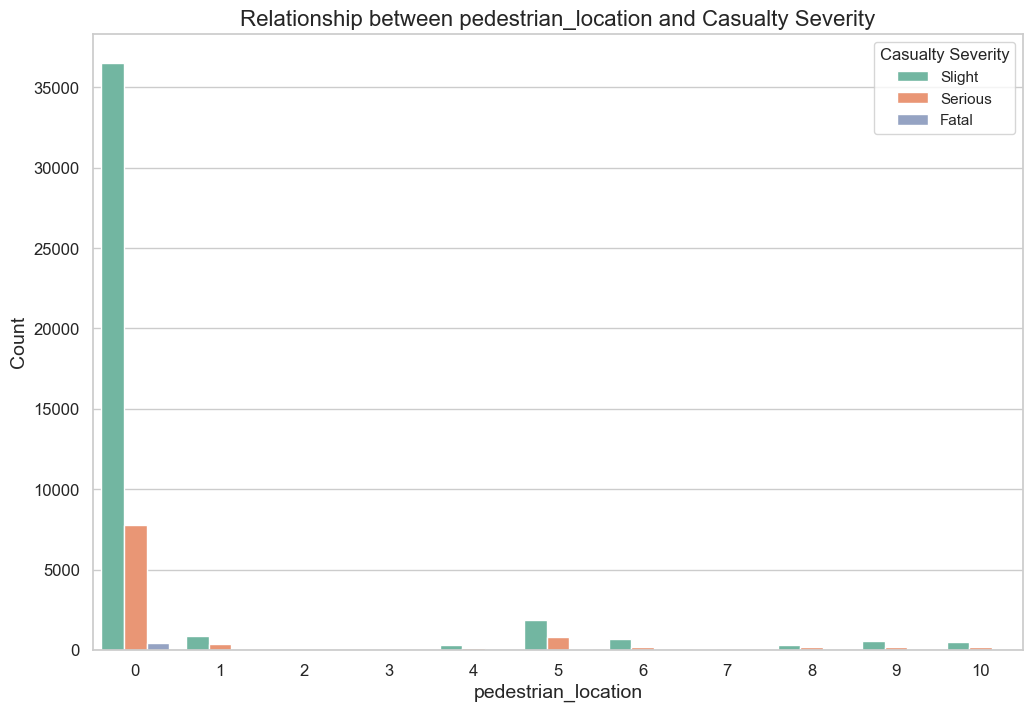

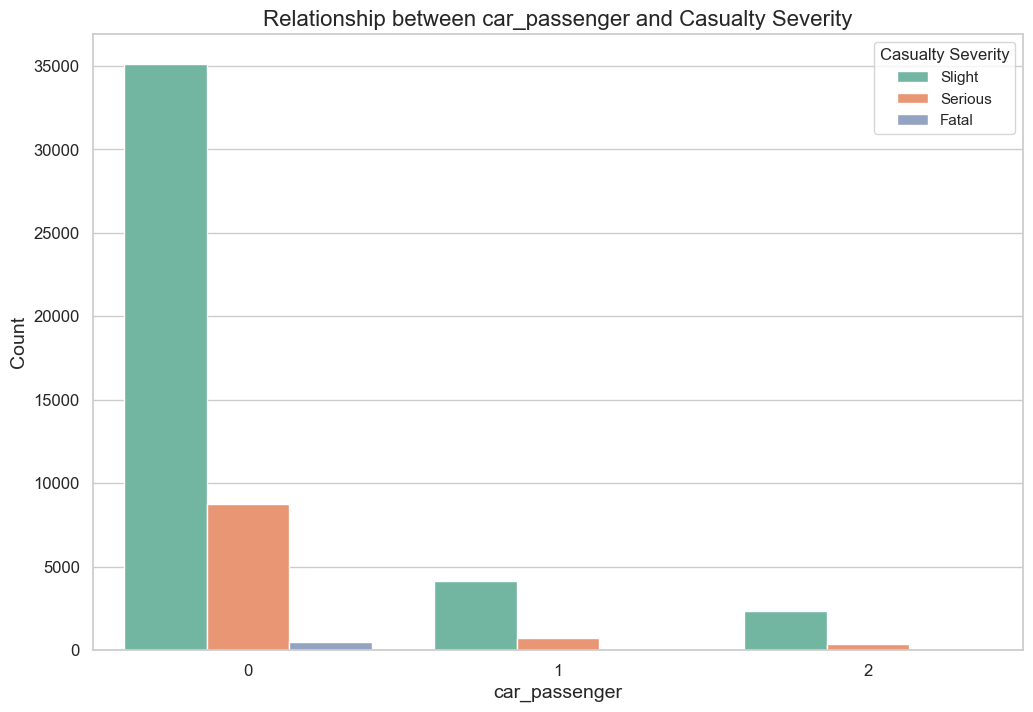

In [37]:
sns.set(style="whitegrid", palette="muted")

# For categorical variables
categorical_vars = ['casualty_class', 'sex_of_casualty', 'pedestrian_location', 'car_passenger']

for var in categorical_vars:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=var, hue='casualty_severity', data=df, palette="Set2")
    plt.title(f'Relationship between {var} and Casualty Severity', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Casualty Severity')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Relationship between age_of_casualty and Casualty Severity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


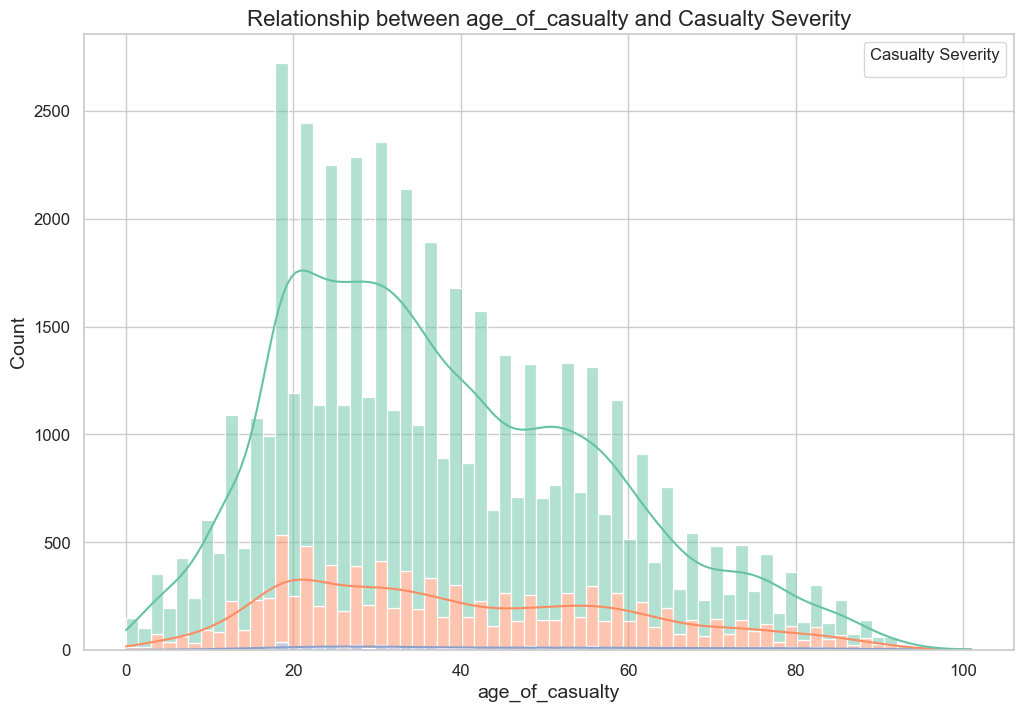

In [38]:
# For numerical variables
numerical_vars = ['age_of_casualty']

for var in numerical_vars:
    plt.figure(figsize=(12, 8))
    sns.histplot(df, x=var, hue='casualty_severity', multiple="stack", kde=True, palette="Set2")
    plt.title(f'Relationship between {var} and Casualty Severity', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Casualty Severity')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()